# Aufgabe 2

## Teil 1

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
package_data = pd.read_csv('Praxisnahe_Aufgabe/Aufgabe/package_data.csv')
recipe_data = pd.read_csv('Praxisnahe_Aufgabe/Aufgabe/recipe_data.csv')

In [3]:
recipe_data['recipe'].value_counts()

vegan parmesan         45
vegan hero 150g        18
vegan cheese sticks    12
cheese sticks          11
vegan hero 400g         3
test                    1
Name: recipe, dtype: int64

In [4]:
recipe_data_vegan_parmesan = recipe_data.loc[recipe_data['recipe'] == "vegan parmesan"]

In [5]:
recipe_data_vegan_parmesan['timestamp'] =  pd.to_datetime(recipe_data_vegan_parmesan['timestamp'])

In [6]:
package_data['timestamp'] =  pd.to_datetime(package_data['timestamp'])

In [7]:
package_data1 = package_data.drop(columns=['machine_identifier', 'good_packs'])

In [8]:
package_data1 = package_data1.dropna()

In [9]:
recipe_data_vegan_parmesan['date_column'] = pd.to_datetime(recipe_data_vegan_parmesan['timestamp']).dt.date

In [10]:
package_data1['date_column'] = pd.to_datetime(package_data1['timestamp']).dt.date

In [11]:
df1 = pd.merge(package_data1, recipe_data_vegan_parmesan, on=["date_column"])

In [12]:
df2 = df1.groupby("date_column").sum(list)

In [13]:
df2["reject_packs"].sum()

127227

[Text(19113.0, 0, '2022-05-01'),
 Text(19127.0, 0, '2022-05-15'),
 Text(19144.0, 0, '2022-06-01'),
 Text(19158.0, 0, '2022-06-15'),
 Text(19174.0, 0, '2022-07-01'),
 Text(19188.0, 0, '2022-07-15'),
 Text(19205.0, 0, '2022-08-01')]

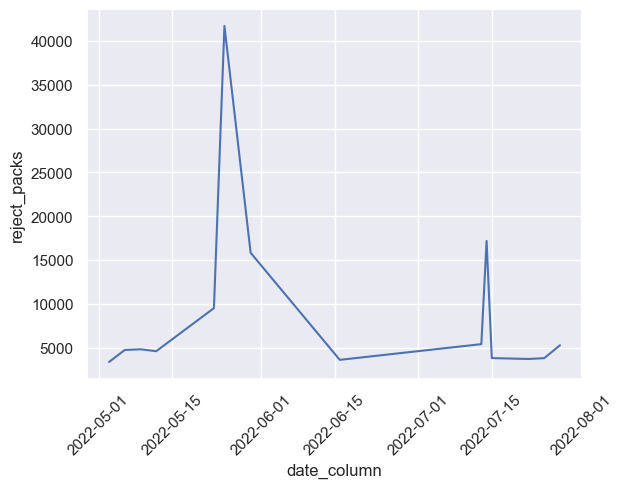

In [14]:
g = sns.lineplot(x="date_column", y="reject_packs", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

## Teil 2

In [15]:
error_messages_accumulated = pd.read_csv('Praxisnahe_Aufgabe/Aufgabe/error_messages_accumulated.csv')
error_messages_timeline = pd.read_csv('Praxisnahe_Aufgabe/Aufgabe/error_messages_timeline.csv')

In [18]:
error_messages_accumulated_Lichtsschranke = error_messages_accumulated.loc[error_messages_accumulated['code'] == 1019]

In [19]:
error_messages_accumulated_Lichtsschranke

,machine_identifier,timestamp,accumulated_dead_time,identifier,station,station_instance,subsystem_instance,code
222,innovative_cheese_machine,2022-05-23T04:00:00.000Z,30.069,91.0.122.0.1019.0.1.0,91,0,0,1019
223,innovative_cheese_machine,2022-05-23T20:00:00.000Z,128.025,91.0.122.0.1019.0.1.0,91,0,0,1019
224,innovative_cheese_machine,2022-06-27T17:00:00.000Z,56.732,91.0.122.0.1019.0.1.0,91,0,0,1019
225,innovative_cheese_machine,2022-07-16T11:00:00.000Z,48.064,91.0.122.0.1019.0.1.0,91,0,0,1019
228,innovative_cheese_machine,2022-05-04T08:00:00.000Z,9.780,92.0.122.0.1019.0.1.0,92,0,0,1019
...,...,...,...,...,...,...,...,...
1154,innovative_cheese_machine,2022-07-14T22:00:00.000Z,23.596,93.0.122.0.1019.0.1.0,93,0,0,1019
1155,innovative_cheese_machine,2022-07-19T05:00:00.000Z,48.621,93.0.122.0.1019.0.1.0,93,0,0,1019
1156,innovative_cheese_machine,2022-07-21T03:00:00.000Z,0.024,93.0.122.0.1019.0.1.0,93,0,0,1019
1157,innovative_cheese_machine,2022-07-22T19:00:00.000Z,70.117,93.0.122.0.1019.0.1.0,93,0,0,1019


In [20]:
error_messages_accumulated_Lichtsschranke['timestamp'] =  pd.to_datetime(error_messages_accumulated_Lichtsschranke['timestamp'])

In [21]:
error_messages_accumulated_Lichtsschranke['date_column'] = pd.to_datetime(error_messages_accumulated_Lichtsschranke['timestamp']).dt.date

In [22]:
error_messages_accumulated_Lichtsschranke

,machine_identifier,timestamp,accumulated_dead_time,identifier,station,station_instance,subsystem_instance,code,date_column
222,innovative_cheese_machine,2022-05-23 04:00:00+00:00,30.069,91.0.122.0.1019.0.1.0,91,0,0,1019,2022-05-23
223,innovative_cheese_machine,2022-05-23 20:00:00+00:00,128.025,91.0.122.0.1019.0.1.0,91,0,0,1019,2022-05-23
224,innovative_cheese_machine,2022-06-27 17:00:00+00:00,56.732,91.0.122.0.1019.0.1.0,91,0,0,1019,2022-06-27
225,innovative_cheese_machine,2022-07-16 11:00:00+00:00,48.064,91.0.122.0.1019.0.1.0,91,0,0,1019,2022-07-16
228,innovative_cheese_machine,2022-05-04 08:00:00+00:00,9.780,92.0.122.0.1019.0.1.0,92,0,0,1019,2022-05-04
...,...,...,...,...,...,...,...,...,...
1154,innovative_cheese_machine,2022-07-14 22:00:00+00:00,23.596,93.0.122.0.1019.0.1.0,93,0,0,1019,2022-07-14
1155,innovative_cheese_machine,2022-07-19 05:00:00+00:00,48.621,93.0.122.0.1019.0.1.0,93,0,0,1019,2022-07-19
1156,innovative_cheese_machine,2022-07-21 03:00:00+00:00,0.024,93.0.122.0.1019.0.1.0,93,0,0,1019,2022-07-21
1157,innovative_cheese_machine,2022-07-22 19:00:00+00:00,70.117,93.0.122.0.1019.0.1.0,93,0,0,1019,2022-07-22


[Text(19113.0, 0, '2022-05-01'),
 Text(19127.0, 0, '2022-05-15'),
 Text(19144.0, 0, '2022-06-01'),
 Text(19158.0, 0, '2022-06-15'),
 Text(19174.0, 0, '2022-07-01'),
 Text(19188.0, 0, '2022-07-15'),
 Text(19205.0, 0, '2022-08-01')]

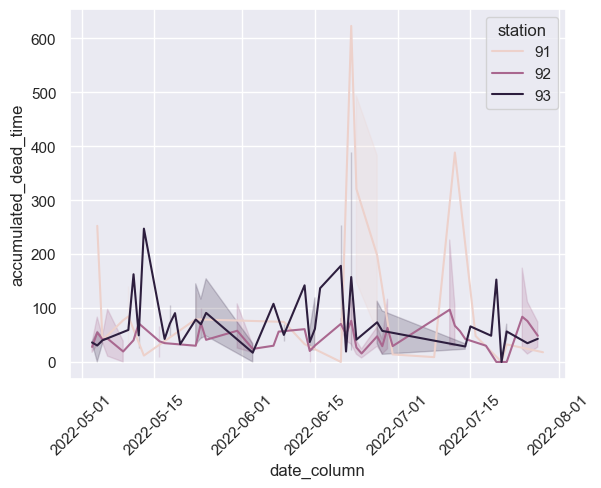

In [24]:
g = sns.lineplot(x="date_column", y="accumulated_dead_time", hue = "station",data=error_messages_accumulated_Lichtsschranke)
g.set_xticklabels(g.get_xticklabels(), rotation=45)